In [1]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")
env.unwrapped.configure({
    "action": {"type": "ContinuousAction"},  # Ensure continuous action
})
# Wrap the environment
env.reset()

(array([[ 1.        ,  0.90739906,  0.25      ,  0.3125    ,  0.        ],
        [ 1.        ,  0.10464889, -0.25      , -0.01543026,  0.        ],
        [ 1.        ,  0.20141236, -0.25      , -0.02373946,  0.        ],
        [ 1.        ,  0.30110726,  0.25      , -0.01362653,  0.        ],
        [ 1.        ,  0.41001832,  0.        , -0.03967122,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': array([-0.8824699,  0.7143706], dtype=float32),
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.3333333333333333,
   'high_speed_reward': 0.8333333333333334,
   'on_road_reward': 1.0,
   'reverse_reward': 0.0,
   'stopping_penalty': 0}})

In [20]:
# Create action noise for exploration
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Create the DDPG model
model = DDPG(
    "MlpPolicy",
    env,
    action_noise=action_noise,
    learning_rate=0.0003,
    gamma=0.99,
    buffer_size=1000000,
    tau=0.005,
    batch_size=64,
    verbose=1,
    tensorboard_log="ddpg_highway_tensorboard"
)

# Train the model
model.learn(total_timesteps=10000, tb_log_name="ddpg1")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.25     |
|    ep_rew_mean     | 0.262    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 1        |
|    total_timesteps | 5        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.38     |
|    ep_rew_mean     | 0.258    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 11       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5      |
|    ep_rew_mean     | 0.172    |
| time/              |          |
|    episode

In [3]:
model.set_env(env)
model.learn(total_timesteps=5000, tb_log_name="ddpg1",reset_num_timesteps=False)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ddpg_highway_tensorboard\ddpg1_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 804      |
|    fps             | 3        |
|    time_elapsed    | 31       |
|    total_timesteps | 15120    |
| train/             |          |
|    actor_loss      | -51.4    |
|    critic_loss     | 0.426    |
|    learning_rate   | 0.0003   |
|    n_updates       | 15019    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 808      |
|    fps             | 3        |
|    time_elapsed    | 93       |
|    total_timesteps | 15280    |
| train/             |          |
|    actor_loss      | -52.1 

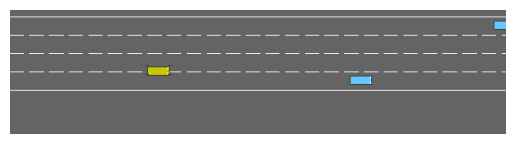

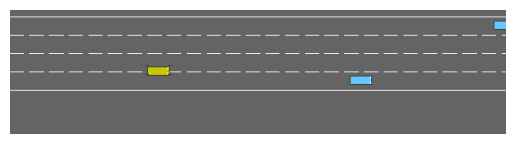

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [ ]:
# Save the trained model
model.save("ddpg_hiaghwayv1")

In [2]:
model = DDPG.load("ddpg_highwayv1")

Testing TD3 Model on Highway-v0 Environment
Episode 1: Reward = 33.19, Length = 40 timesteps, Crash: False
Episode 2: Reward = 32.72, Length = 40 timesteps, Crash: False
Episode 3: Reward = 32.34, Length = 40 timesteps, Crash: False
Episode 4: Reward = 32.24, Length = 40 timesteps, Crash: False
Episode 5: Reward = 32.51, Length = 40 timesteps, Crash: False
Episode 6: Reward = 32.57, Length = 40 timesteps, Crash: False
Episode 7: Reward = 7.69, Length = 10 timesteps, Crash: True
Episode 8: Reward = 32.84, Length = 40 timesteps, Crash: False
Episode 9: Reward = 32.24, Length = 40 timesteps, Crash: False
Episode 10: Reward = 32.80, Length = 40 timesteps, Crash: False
Episode 11: Reward = 32.84, Length = 40 timesteps, Crash: False
Episode 12: Reward = 26.90, Length = 33 timesteps, Crash: True
Episode 13: Reward = 32.96, Length = 40 timesteps, Crash: False
Episode 14: Reward = 25.70, Length = 32 timesteps, Crash: True
Episode 15: Reward = 31.65, Length = 40 timesteps, Crash: False
Episode 1

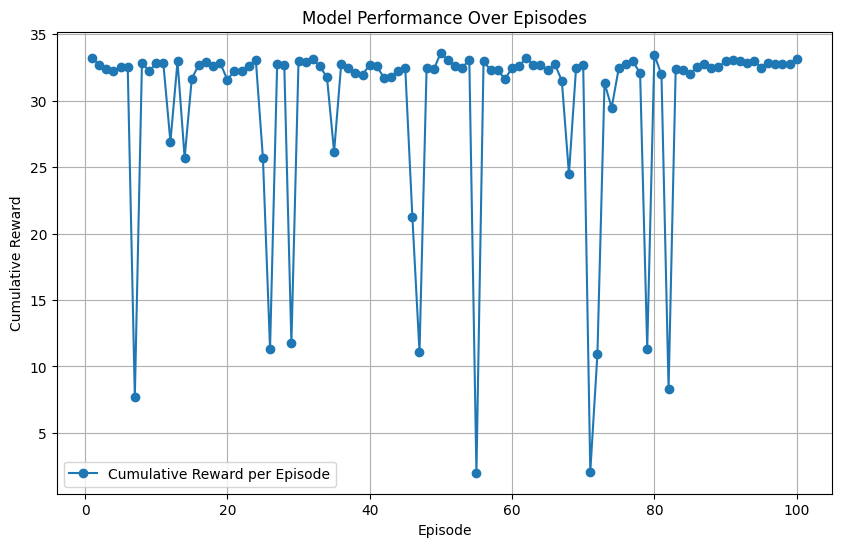

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

timestep_rewards = []
cumulative_rewards = []
episode_lengths = []
crashes = 0  # Track number of crashes
timesteps = []

# Run the trained model for testing
current_timestep = 0
total_episodes = 100

print("Testing TD3 Model on Highway-v0 Environment")

for episode in range(total_episodes):  
    done = truncated = False
    obs, info = env.reset()
    total_reward = 0
    episode_length = 0
    episode_crash = False  # Track crash per episode

    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        # Accumulate rewards and track timesteps
        total_reward += reward
        current_timestep += 1
        episode_length += 1
        env.render()

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

        # Log timestep data
        timestep_rewards.append(reward)
        timesteps.append(current_timestep)

    # Update statistics
    cumulative_rewards.append(total_reward)
    episode_lengths.append(episode_length)
    crashes += int(episode_crash)  # Count if the episode had a crash

    print(f"Episode {episode + 1}: Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward = sum(cumulative_rewards) / total_episodes
mean_episode_length = sum(episode_lengths) / total_episodes
crash_rate = crashes / total_episodes  # Percentage of episodes with crashes

print(f"\nMean Reward: {mean_reward:.2f}")
print(f"Mean Episode Length: {mean_episode_length:.2f}")
print(f"Crash Rate: {crash_rate:.2%}")

# Cumulative Rewards Plot
episodes = range(1, len(cumulative_rewards) + 1)
plt.figure(figsize=(10, 6))
plt.plot(episodes, cumulative_rewards, marker='o', label="Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Model Performance Over Episodes")
plt.legend()
plt.grid(True)
plt.show()


Episode 1 (No Delay): Total Reward = 11.07, Length = 13 timesteps, Crash: True
Episode 2 (No Delay): Total Reward = 35.59, Length = 40 timesteps, Crash: False
Episode 3 (No Delay): Total Reward = 35.10, Length = 40 timesteps, Crash: False
Episode 4 (No Delay): Total Reward = 35.83, Length = 40 timesteps, Crash: False
Episode 5 (No Delay): Total Reward = 36.19, Length = 40 timesteps, Crash: False
Episode 6 (No Delay): Total Reward = 33.58, Length = 40 timesteps, Crash: False
Episode 7 (No Delay): Total Reward = 35.47, Length = 40 timesteps, Crash: False
Episode 8 (No Delay): Total Reward = 35.22, Length = 40 timesteps, Crash: False
Episode 9 (No Delay): Total Reward = 35.10, Length = 40 timesteps, Crash: False
Episode 10 (No Delay): Total Reward = 34.74, Length = 40 timesteps, Crash: False
Episode 11 (No Delay): Total Reward = 35.22, Length = 40 timesteps, Crash: False
Episode 12 (No Delay): Total Reward = 33.46, Length = 40 timesteps, Crash: False
Episode 13 (No Delay): Total Reward = 

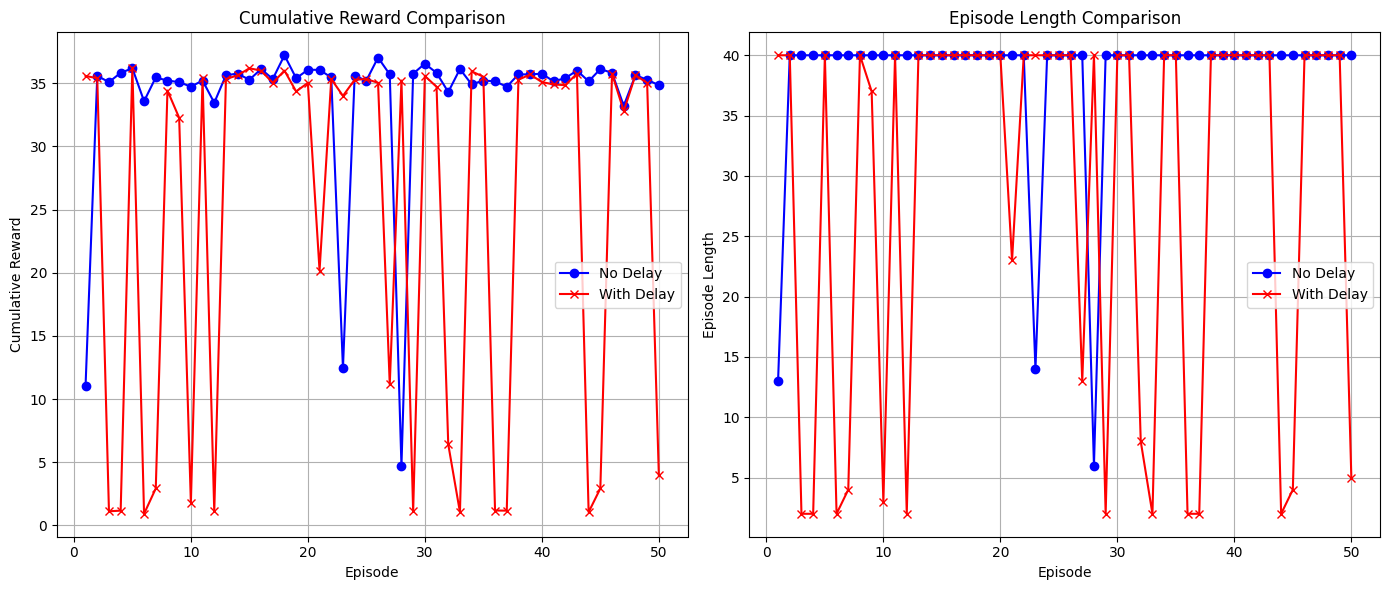

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN

# Load the pre-trained DQN model
model = DQN.load("DQN_highwayv1")

# Create the highway-v1 environment
env = gym.make("highway-v1", render_mode="rgb_array")  # Ensure highway-v1 is registered

# Number of test episodes
n_episodes = 50

# Exponential delay parameters
scale = 1.2  # Mean delay
max_delay = 2  # Maximum delay in seconds

# Tracking performance metrics for both tests
cumulative_rewards_no_delay = []
cumulative_rewards_with_delay = []
episode_lengths_no_delay = []
episode_lengths_with_delay = []
crashes_no_delay = 0
crashes_with_delay = 0

# Run testing without delay
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    episode_crash = False  # Track crash per episode

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

    cumulative_rewards_no_delay.append(total_reward)
    episode_lengths_no_delay.append(episode_length)
    crashes_no_delay += int(episode_crash)

    print(f"Episode {episode + 1} (No Delay): Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

# Run testing with delay
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    episode_crash = False

    # Generate a random delay from an exponential distribution, capped at max_delay
    random_delay = min(np.random.exponential(scale), max_delay)

    while not done:
        action, _ = model.predict(obs, deterministic=True)

        # Apply the computation delay before executing the action
        env.unwrapped.elapse(random_delay)

        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

    cumulative_rewards_with_delay.append(total_reward)
    episode_lengths_with_delay.append(episode_length)
    crashes_with_delay += int(episode_crash)

    print(f"Episode {episode + 1} (With Delay): Delay = {random_delay:.2f}s, Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward_no_delay = sum(cumulative_rewards_no_delay) / n_episodes
mean_reward_with_delay = sum(cumulative_rewards_with_delay) / n_episodes
mean_episode_length_no_delay = sum(episode_lengths_no_delay) / n_episodes
mean_episode_length_with_delay = sum(episode_lengths_with_delay) / n_episodes
crash_rate_no_delay = crashes_no_delay / n_episodes
crash_rate_with_delay = crashes_with_delay / n_episodes

print(f"\nWithout Delay - Mean Reward: {mean_reward_no_delay:.2f}, Mean Episode Length: {mean_episode_length_no_delay:.2f}, Crash Rate: {crash_rate_no_delay:.2%}")
print(f"With Delay - Mean Reward: {mean_reward_with_delay:.2f}, Mean Episode Length: {mean_episode_length_with_delay:.2f}, Crash Rate: {crash_rate_with_delay:.2%}")

# Plot the results
episodes = range(1, n_episodes + 1)

plt.figure(figsize=(14, 6))

# Cumulative Reward Comparison
plt.subplot(1, 2, 1)
plt.plot(episodes, cumulative_rewards_no_delay, marker='o', label="No Delay", color='blue')
plt.plot(episodes, cumulative_rewards_with_delay, marker='x', label="With Delay", color='red')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison")
plt.legend()
plt.grid(True)

# Episode Length Comparison
plt.subplot(1, 2, 2)
plt.plot(episodes, episode_lengths_no_delay, marker='o', label="No Delay", color='blue')
plt.plot(episodes, episode_lengths_with_delay, marker='x', label="With Delay", color='red')
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Episode Length Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


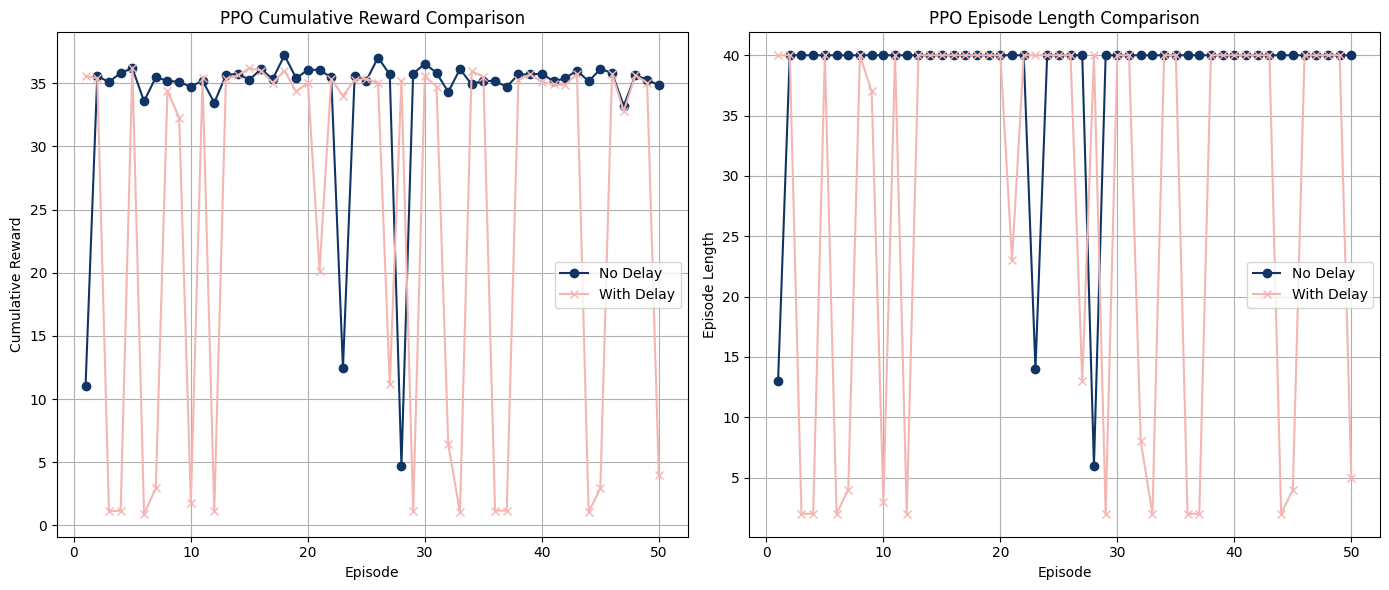

In [6]:
plt.figure(figsize=(14, 6))

# Cumulative Reward Comparison
plt.subplot(1, 2, 1)
plt.plot(episodes, cumulative_rewards_no_delay, marker='o', label="No Delay", color='#103463')
plt.plot(episodes, cumulative_rewards_with_delay, marker='x', label="With Delay", color='#f3b6b3')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("PPO Cumulative Reward Comparison")
plt.legend()
plt.grid(True)

# Episode Length Comparison
plt.subplot(1, 2, 2)
plt.plot(episodes, episode_lengths_no_delay, marker='o', label="No Delay", color='#103463')
plt.plot(episodes, episode_lengths_with_delay, marker='x', label="With Delay", color='#f3b6b3')
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("PPO Episode Length Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


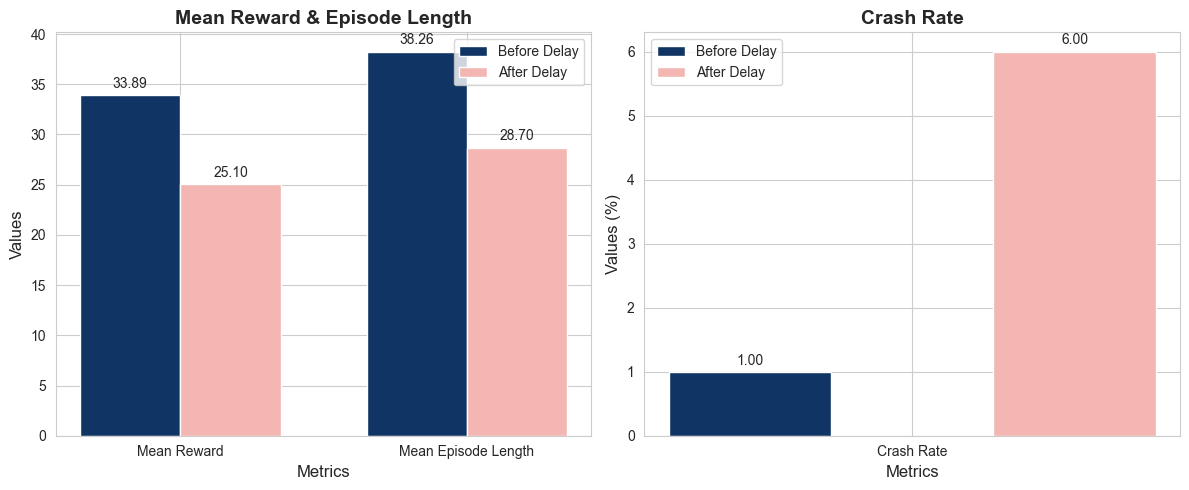

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define metrics
metrics_main = ["Mean Reward", "Mean Episode Length"]
before_delay_main = [33.89, 38.26]  # Mean Reward, Episode Length (before delay)
after_delay_main = [25.10, 28.70]  # Mean Reward, Episode Length (after delay)

metrics_crash = ["Crash Rate"]
before_delay_crash = [1.00]  # Crash Rate (before delay)
after_delay_crash = [6.00]  # Crash Rate (after delay)

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First Chart: Mean Reward & Episode Length ---
x = np.arange(len(metrics_main))  # Label positions
width = 0.35  # Bar width

bars1 = axes[0].bar(x - width/2, before_delay_main, width, label="Before Delay", color="#103463")
bars2 = axes[0].bar(x + width/2, after_delay_main, width, label="After Delay", color="#f3b6b3")

# Labels & Title
axes[0].set_title("Mean Reward & Episode Length", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Metrics", fontsize=12)
axes[0].set_ylabel("Values", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_main)
axes[0].legend()

# Show value labels on bars
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1, axes[0])
add_labels(bars2, axes[0])

# --- Second Chart: Crash Rate (Side-by-Side Bars) ---
x_crash = np.arange(len(metrics_crash))  # Label position
crash_width = 0.25  # Same bar width for side-by-side

bars3 = axes[1].bar(x_crash - crash_width, before_delay_crash, crash_width, label="Before Delay", color="#103463")
bars4 = axes[1].bar(x_crash + crash_width, after_delay_crash, crash_width, label="After Delay", color="#f3b6b3")

# Labels & Title
axes[1].set_title("Crash Rate", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Metrics", fontsize=12)
axes[1].set_ylabel("Values (%)", fontsize=12)
axes[1].set_xticks(x_crash)
axes[1].set_xticklabels(metrics_crash)
axes[1].legend()

# Show value labels on bars
add_labels(bars3, axes[1])
add_labels(bars4, axes[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
